### SVR

In [62]:
# Imports necessarios
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR

In [63]:
# Importando dataframes
df = pd.read_excel('../baseDeDados/dataBaseTratada.xlsx')
dfTeste = pd.read_excel('../baseDeDados/dataBaseTeste.xlsx')

In [64]:
# Criando novas colunas
df['order_weekday'] = pd.to_datetime(df['order_purchase_timestamp']).dt.dayofweek
df['is_sao_paulo_estado_comprador'] = (df['customer_state'] == 'sao paulo').astype(int)
df['is_sao_paulo_cidade_comprador'] = (df['customer_city'] == 'sao paulo').astype(int)
df['is_sao_paulo_estado_vendedor'] = (df['seller_state'] == 'SP').astype(int)
df['is_sao_paulo_cidade_vendedor'] = (df['seller_city'] == 'sao paulo').astype(int)
df['is_credit_card'] = (df['payment_type'] == 'credit_card').astype(int)

In [65]:
df = df[df['delivery_time'] < 40]

In [66]:
df

,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,...,Longitude_Comprador,Latitude_Vendedor,Longitude_Vendedor,Distancia,order_weekday,is_sao_paulo_estado_comprador,is_sao_paulo_cidade_comprador,is_sao_paulo_estado_vendedor,is_sao_paulo_cidade_vendedor,is_credit_card
0,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,-46.6395,-23.6677,-46.4613,23.545096,0,1,1,1,0,0
1,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,-46.6395,-23.6677,-46.4613,23.545096,0,1,1,1,0,0
2,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,-46.6395,-23.6677,-46.4613,23.545096,0,1,1,1,0,1
3,papelaria,stationery,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,sao paulo,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,...,-46.5432,-23.5208,-46.1854,40.228060,1,1,0,1,0,1
4,automotivo,auto,503740e9ca751ccdda7ba28e9ab8f608,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,parana,a4591c265e18cb1dcee52889e2d8acc3,1,060cb19345d90064d1015407193c233d,...,-50.6455,-23.4538,-46.5333,419.422496,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73395,bebes,baby,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,sao paulo,63943bddc261676b46f01ca7ac2f7bd8,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,-46.4121,-21.9335,-50.5191,479.562236,1,1,0,1,0,1
73396,eletrodomesticos_2,home_appliances_2,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,alcobaça,bahia,83c1379a015df1e13d02aae0204711ab,1,b80910977a37536adeddd63663f916ad,...,-39.3743,-23.5329,-46.6395,981.620771,6,0,0,1,1,1
73397,informatica_acessorios,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,cachoeiras de macacu,rio de janeiro,11c177c8e97725db2631073c19f07b62,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,-42.6523,-20.9402,-45.8308,369.590572,0,0,0,0,0,1
73398,informatica_acessorios,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,cachoeiras de macacu,rio de janeiro,11c177c8e97725db2631073c19f07b62,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,-42.6523,-20.9402,-45.8308,369.590572,0,0,0,0,0,1


In [67]:
# Selecionar colunas relevantes
selected_columns = ['delivery_time', 'customer_zip_code_prefix', 'is_sao_paulo_estado_comprador', 'is_sao_paulo_cidade_comprador', 'is_sao_paulo_cidade_vendedor', 'is_sao_paulo_estado_vendedor', 'is_credit_card', 'Distancia', 'Latitude_Vendedor', 'Latitude_Comprador', 'Longitude_Comprador', 'Longitude_Vendedor']
data_selected = df[selected_columns]

# Separar as variáveis independentes (features) e a variável dependente (target)
X = data_selected.drop('delivery_time', axis=1)
y = data_selected['delivery_time']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo LinearSVR
model = LinearSVR(random_state=42)
model.fit(X_train_scaled, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test_scaled)

/home/jose/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [68]:
# Cálculos adicionais para avaliação do modelo
rss = sum((y_test - y_pred) ** 2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rss, mse, rmse, r2

(513261.5471179885, 35.54196711571149, 5.961708405793719, 0.12919917258809777)

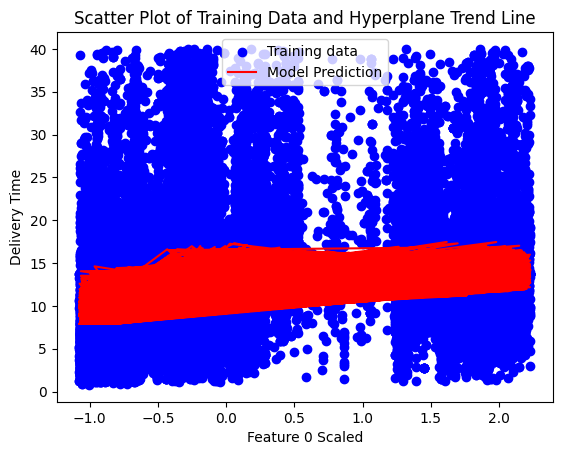

In [69]:
# Plotar o scatter plot dos valores de treino com a reta de tendência do hiperplano
plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label='Training data')
plt.plot(X_train_scaled[:, 0], model.predict(X_train_scaled), color='red', label='Model Prediction')
plt.xlabel('Feature 0 Scaled')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot of Training Data and Hyperplane Trend Line')
plt.legend()
plt.show()

In [70]:
# Criando novas colunas para o dfKaggle
dfTeste['is_sao_paulo_estado_comprador'] = (dfTeste['customer_state'] == 'sao paulo').astype(int)
dfTeste['is_sao_paulo_cidade_comprador'] = (dfTeste['customer_city'] == 'sao paulo').astype(int)
dfTeste['is_sao_paulo_estado_vendedor'] = (dfTeste['seller_state'] == 'SP').astype(int)
dfTeste['is_sao_paulo_cidade_vendedor'] = (dfTeste['seller_city'] == 'sao paulo').astype(int)
dfTeste['is_credit_card'] = (dfTeste['payment_type'] == 'credit_card').astype(int)

In [71]:
# Teste na base de dados do Kaggle
X = dfTeste[['customer_zip_code_prefix', 'is_sao_paulo_estado_comprador', 'is_sao_paulo_cidade_comprador', 'is_sao_paulo_cidade_vendedor', 'is_sao_paulo_estado_vendedor', 'is_credit_card', 'Distancia', 'Latitude_Vendedor', 'Latitude_Comprador', 'Longitude_Comprador', 'Longitude_Vendedor']]

# Predições no conjunto de teste
y_pred = model.predict(X)

/home/jose/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


In [72]:
# Criando o dataFrame do Kaggle
dfTeste['previsoes'] = y_pred
dfKaggle = dfTeste[['order_id', 'previsoes']]

In [73]:
dfKaggle

,order_id,previsoes
0,cee3292f46ede6ea1dfabfcb200fcf47,-1117.285598
1,50dca53ca33b739bef09e7933e8b380e,-759.471494
2,8087ec71e393d4dc6fc48041fe63cd51,-522.870991
3,e6b6557ce111de79b31cc857f20ba212,-3806.583223
4,0b09c5e4c2512f627190ac55a78c35a3,-12322.719383
...,...,...
28147,81cedc4d2132eb6f512354166e51b187,-1587.478253
28148,95811675a89b66659996da5285a021db,-9293.269232
28149,25bd2ad9d282f59e4e6a048ef9bf214f,-7333.694989
28150,9f9ac312604229686c04260955495c70,-429.542100


In [74]:
# Exportar o DataFrame para um arquivo CSV
dfKaggle.to_csv('../resultadoPrevisoes/previsaoSVR.csv', index=False)